In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# read functions.# read functions.
import os
for f in os.listdir('../fun/'): exec(open('../fun/'+f).read())
del f

# Load data
load( '../out/d3-fight-level-transform.pkl' )

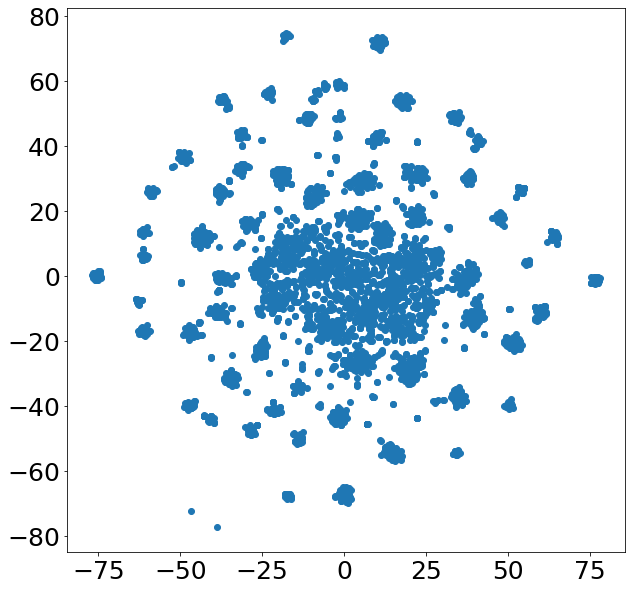

In [10]:
# data must be standardized/normalized!

from sklearn.manifold import TSNE
Tsne_transformed = TSNE( learning_rate = 100 ).fit_transform(X)

import matplotlib.pyplot as plt
plt.figure(1,figsize=(10,10),dpi=72)
plt.scatter( Tsne_transformed[:,0], Tsne_transformed[:,1] )
plt.show()

In [13]:
# what about first 2 PCA clusters?
from sklearn.decomposition import PCA
pcafit = PCA().fit(X)

# print variance by selected PCA features.
print('Variance:  Projected dimension')
print('------------------------------')
pcaout = pd.DataFrame({
    'variance': [ pcafit.explained_variance_ratio_[idx] for idx in range(pcafit.components_.shape[0]) ],
    'eq' : [ "+".join( "{0:5.2f} * {1:s}".format( val, name ) for val, name in zip(row, cols)) for idx, row in enumerate(pcafit.components_) ]
})
pcaout['cumulative_var'] = pcaout.variance.cumsum()
print( pcaout[ [ 'variance', 'cumulative_var' ] ].head(10) )

Variance:  Projected dimension
------------------------------
   variance  cumulative_var
0  0.050663        0.050663
1  0.035437        0.086101
2  0.032391        0.118492
3  0.026246        0.144738
4  0.020707        0.165445
5  0.019836        0.185281
6  0.018465        0.203746
7  0.016365        0.220111
8  0.016284        0.236396
9  0.014971        0.251367


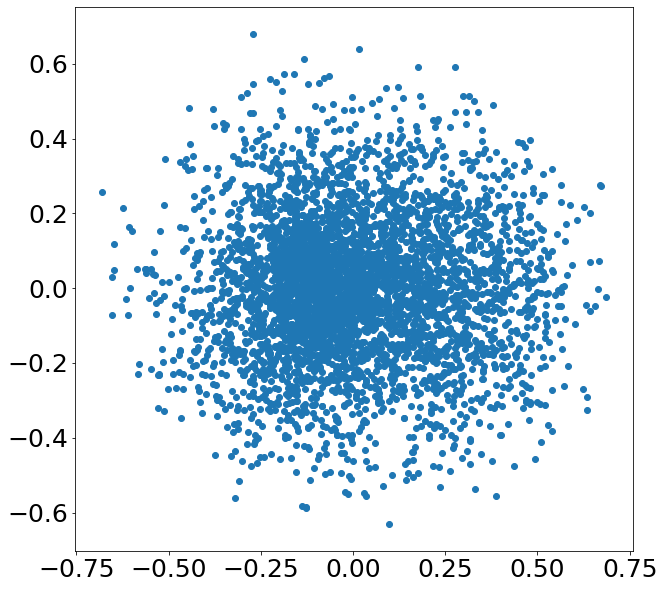

In [15]:
# reduce to selected pca features (plot first 2)
# though this only includes 8% of the variation..
xpca = PCA( n_components = 2).fit_transform( X )
plt.figure(1,figsize=(10,10),dpi=72)
plt.scatter(xpca[:,0], xpca[:,1])
plt.show()